<a href="https://colab.research.google.com/github/SpandanaKaddi/machinelearning/blob/main/NeuralNetwork_sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])  # NAND problem

In [3]:
#Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
#Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

In [5]:
epoch = 100000
learning_rate = 0.01
input_layer_neurons = 2  # number of features
hidden_layer_neurons = 3  # number of hidden neurons
output_neurons = 1  # number of output neurons

In [6]:
#initializing weights and biases
np.random.seed(0)  # for reproducibility
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))

In [7]:
#Backpropagation algorithm
for epoch in range(epoch):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    final_input = np.dot(hidden_layer_output, weights_hidden_output)
    final_output = sigmoid(final_input)

    # Backward propagation
    error = Y - final_output
    d_final_output = error * sigmoid_derivative(final_output)

    error_hidden_layer = d_final_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_final_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

In [8]:
#print final output
print("Final output after training:")
print(final_output)

# Compute the mean squared error
mse = np.mean(np.square(Y - final_output))
print("Mean Squared Error:",mse)

Final output after training:
[[0.12522766]
 [0.91304128]
 [0.91330697]
 [0.05990305]]
Mean Squared Error: 0.008586961395915294


In [9]:
#Test the model with new data
test_data = [0, 1]
hidden_layer_input = np.dot(test_data, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)
final_input = np.dot(hidden_layer_output, weights_hidden_output)
final_output = sigmoid(final_input)
print("Test data:", test_data)
print("Predicted output:", final_output)
print("Actual output:", Y[1])  # Expected output for XOR(0, 1) is 1

Test data: [0, 1]
Predicted output: [0.91304216]
Actual output: [1]


In [10]:
# Display the weights and biases rounding to 2 decimal places

print("Weights from input to hidden layer:")
print(np.round(weights_input_hidden, 2))  # Use np.round for NumPy arrays

print("Weights from hidden to output layer:")
print(np.round(weights_hidden_output, 2))  # Use np.round for NumPy arrays

Weights from input to hidden layer:
[[-2.56  5.07  4.92]
 [ 4.91 -2.64  4.94]]
Weights from hidden to output layer:
[[-6.75]
 [-6.7 ]
 [ 9.57]]


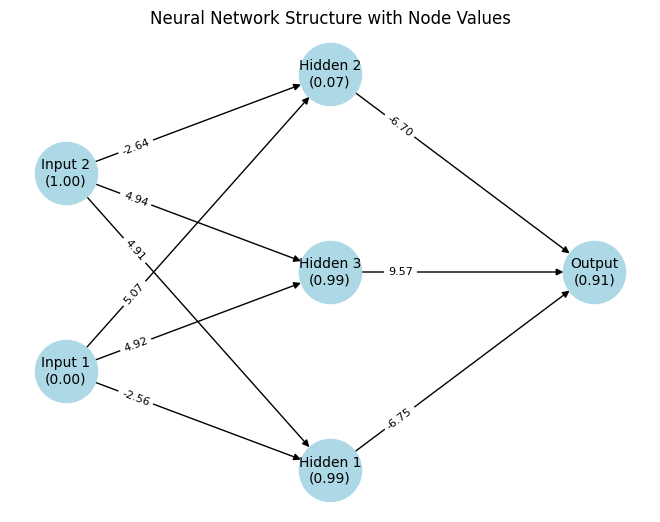

In [11]:
#Plot the netwrork grpahically
import matplotlib.pyplot as plt
import networkx as nx

def plot_neural_network(weights_input_hidden, weights_hidden_output, input_values, hidden_values, output_value):
    import matplotlib.pyplot as plt
    import networkx as nx

    G = nx.DiGraph()

    # Input layer
    for i in range(input_layer_neurons):
        G.add_node(f'Input {i+1}', layer=0, value=input_values[i])  # Assign layer 0 for input nodes

    # Hidden layer
    for i in range(hidden_layer_neurons):
        G.add_node(f'Hidden {i+1}', layer=1, value=hidden_values[i])  # Assign layer 1 for hidden nodes

    # Output layer
    G.add_node('Output', layer=2, value=output_value)  # Assign layer 2 for output node

    # Add edges from input to hidden layer
    for i in range(input_layer_neurons):
        for j in range(hidden_layer_neurons):
            G.add_edge(f'Input {i+1}', f'Hidden {j+1}', weight=round(weights_input_hidden[i][j], 2))

    # Add edges from hidden to output layer
    for i in range(hidden_layer_neurons):
        G.add_edge(f'Hidden {i+1}', 'Output', weight=round(weights_hidden_output[i][0], 2))

    # Use multipartite layout with explicit layer ordering
    pos = nx.multipartite_layout(G, subset_key="layer")

    # Draw the graph
    node_labels = {
        node: f"{node}\n({data['value']:.2f})" if np.isscalar(data['value']) else f"{node}\n({data['value'].item():.2f})"
        for node, data in G.nodes(data=True)
    }  # Add node values
    edge_labels = {
        (u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)
    }  # Round edge weights to 2 decimal places

    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=2000, node_color='lightblue', font_size=10)
    nx.draw_networkx_edge_labels(
        G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.25
    )  # Adjust label_pos to avoid overlap
    plt.title("Neural Network Structure with Node Values")
    plt.show()

# Example usage
input_values = [0, 1]  # Example input values
hidden_layer_input = np.dot(input_values, weights_input_hidden)
hidden_values = sigmoid(hidden_layer_input)  # Hidden layer activations
final_input = np.dot(hidden_values, weights_hidden_output)
output_value = sigmoid(final_input)  # Output value

plot_neural_network(weights_input_hidden, weights_hidden_output, input_values, hidden_values, output_value)

Training with Sigmoid Activation:
Training with Tanh Activation:
Training with ReLU Activation:
Sigmoid MSE: 0.0007117518466904374
Tanh MSE: 0.25000000307892345
ReLU MSE: 0.5


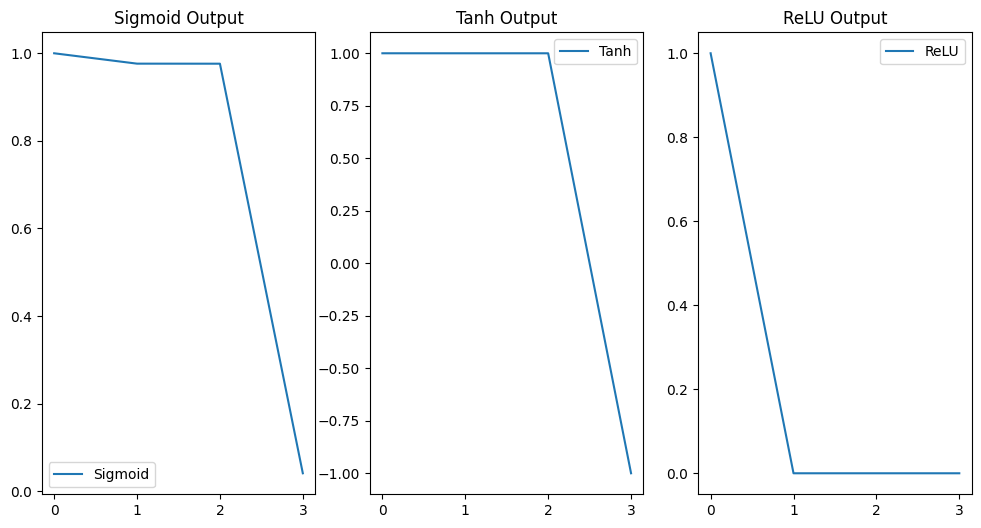

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# NAND gate dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[1], [1], [1], [0]])

# Sigmoid, Tanh, and ReLU activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.square(x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Neural Network parameters
num_epochs = 100000  # Change 'epoch' to 'num_epochs'
learning_rate = 0.01
input_layer_neurons = 2  # number of features
hidden_layer_neurons = 3  # number of hidden neurons
output_neurons = 1  # number of output neurons

# Initialize weights and biases globally
np.random.seed(0)
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))

# Training function
def train_nn(activation_function, activation_derivative, X, Y, weights_input_hidden, weights_hidden_output, bias_hidden):
    # Backpropagation algorithm
    for epoch in range(num_epochs):  # Use num_epochs instead of epoch
        # Forward propagation
        hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
        hidden_layer_output = activation_function(hidden_layer_input)

        final_input = np.dot(hidden_layer_output, weights_hidden_output)
        final_output = activation_function(final_input)

        # Backward propagation
        error = Y - final_output
        d_final_output = error * activation_derivative(final_output)

        error_hidden_layer = d_final_output.dot(weights_hidden_output.T)
        d_hidden_layer = error_hidden_layer * activation_derivative(hidden_layer_output)

        # Update weights and biases
        weights_hidden_output += hidden_layer_output.T.dot(d_final_output) * learning_rate
        weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
        bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    return final_output, weights_input_hidden, weights_hidden_output, bias_hidden

# Train the neural network with different activation functions
print("Training with Sigmoid Activation:")
sigmoid_output, weights_input_hidden, weights_hidden_output, bias_hidden = train_nn(sigmoid, sigmoid_derivative, X, Y, weights_input_hidden, weights_hidden_output, bias_hidden)

print("Training with Tanh Activation:")
tanh_output, weights_input_hidden, weights_hidden_output, bias_hidden = train_nn(tanh, tanh_derivative, X, Y, weights_input_hidden, weights_hidden_output, bias_hidden)

print("Training with ReLU Activation:")
relu_output, weights_input_hidden, weights_hidden_output, bias_hidden = train_nn(relu, relu_derivative, X, Y, weights_input_hidden, weights_hidden_output, bias_hidden)

# Compute Mean Squared Error for each activation function
def compute_mse(Y, output):
    return np.mean(np.square(Y - output))

sigmoid_mse = compute_mse(Y, sigmoid_output)
tanh_mse = compute_mse(Y, tanh_output)
relu_mse = compute_mse(Y, relu_output)

print(f"Sigmoid MSE: {sigmoid_mse}")
print(f"Tanh MSE: {tanh_mse}")
print(f"ReLU MSE: {relu_mse}")

# Plot the final outputs for comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(sigmoid_output, label='Sigmoid')
plt.title('Sigmoid Output')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(tanh_output, label='Tanh')
plt.title('Tanh Output')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(relu_output, label='ReLU')
plt.title('ReLU Output')
plt.legend()

plt.show()
